# Assignment 3

As before, if a question can be answered with 'yes/no', or a numeric value, you may simply state as much. If you incorporate code from the internet (which is not required and generally not advisable), please cite the source within your code (providing a URL is sufficient).

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that no outside searches are required by the assignment!). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

import warnings 
warnings.filterwarnings('ignore') # mute warning messages

### Question 1: Resampling via Bootstrapping

Now, we'll use the `iris` dataset, which we will add to Python using the `statsmodels` library. As always, start by reviewing a description of the dataset, by printing the dataset.

In [15]:
# Import
iris = sm.datasets.get_rdataset('iris', 'datasets')
df = pd.DataFrame(iris.data)

df

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


_(i)_ Create an `alpha_func(D, idx)` function which takes the `Sepal`'s `width` and `length` to calculate for alpha

alpha is 0.619

In [16]:
# Your code here
def alpha_func(D, idx):
    cov_ = np.cov(D[['Sepal.Width', 'Sepal.Length']].loc[idx], rowvar=False)
    # From Forumula 5.7 on p.212 of textbook
    return ((cov_[1, 1] - cov_[0,1]) /
            (cov_[0, 0] + cov_[1, 1] - 2*cov_[0,1]))

Test the code below

In [17]:
alpha_func(df, range(100))

0.6189498510165619

_(ii)_ Construct a new bootstrap data set and recompute alpha

The new alpha with bootstrap is 0.668

In [6]:
rng = np.random.default_rng(0)
alpha_func(df,
           rng.choice(100,
                      100,
                      replace=True))

0.6675354865158225

Imagine we are analysts working for a shipping company. The company wants to know the average length of iris' petals, to inform space allotment on an upcoming shipment. The relevant variable in the . 
dataset is `Sepal.Length`
_(iii)_ Why is it (perhaps) not sufficient to simply calculate the mean of `Sepal.Length`? What more information will preforming a bootstrap provide to us?

Using bootstrap can provide more sample values to compute.  

_(iv)_ We can perform bootstrapping in Python by defining a simple function using `boot_SE()` for computing the bootstrap standard error. Remember, because bootstrapping involves randomness, we must first set a seed for reproducibility!

In [10]:
# Add your code here to set the seed

def boot_SE(D, func_a, B=1000, seed=0):
    bootstrap_values = []
    rng = np.random.default_rng(seed)

    n = D.shape[0]
    for i in range(B):
        idx = rng.choice(D.index,
                         n,
                         replace=True)
        
        value = func_a(D, idx)
        bootstrap_values.append(value)
    return np.std(np.array(bootstrap_values)), bootstrap_values # compute std deviation
    

_(v)_ Evaluate the accuracy of our alpha estimate with B = 1000

The standard error is 0.032

In [18]:
# Your code here
alpha_se, bootstrap_values = boot_SE(df, alpha_func)
alpha_se

0.03180510076860767

_(vi)_ What is the original mean value of `Sepal.Length`?

5.843

In [28]:
# Your code here
df['Sepal.Length'].mean()

5.843333333333334

Next, let's create a new bootstrapping to bootstrap samples (`boot_se_samples`) of `Sepal.Length`, in order to compute its bootstrapped mean and standard deviation.

_(vii)_. Write code to review the bootstrapped mean value, and the standard deviation of the bootstrapped samples. Compare the mean against its original value. Then, review the bootstrapped range, by using `t_range = np.ptp(boot_se_samples)`.

The standard deviation of the bootstrap mean values is .066.  
The mean of the bootstrap means is 5.842.  It is very close to the original value.  
The range is 0.387.

In [48]:
# Add your code here
def mean_func(D, idx):
    return D['Sepal.Length'].loc[idx].mean()

mean_se, bootstrap_means = boot_SE(df, mean_func)
mean_of_bootstrap_means = np.mean(bootstrap_means)
print( mean_se)
print(mean_of_bootstrap_means)

t_range = np.ptp(bootstrap_means)
print(t_range)


0.06649295592099295
5.842284666666666
0.3873333333333342


_(viii)_ Next, let's compute 95% confidence intervals, for the mean value of iris sepal length. (Hint: use the `np.percentile` function)

In [53]:
# Add your code here
np.percentile(np.array(bootstrap_means), [2.5, 97.5])

array([5.71861667, 5.97471667])

_(ix)_. Use the plot function to create an histogram of the bootstrapped samples. What does this histogram show ?

Reference: https://www.geeksforgeeks.org/plotting-histogram-in-python-using-matplotlib/

This histogram shows the distribution of the bootstrapped mean values.  

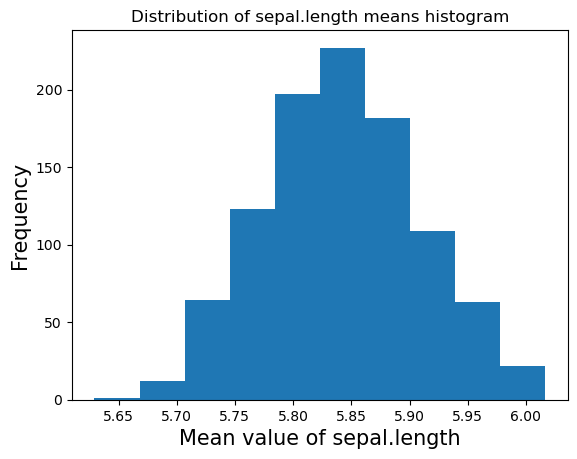

In [58]:
#Complete this


# Create a figure and axis
fig, ax = plt.subplots()

# Create the histogram
plt.hist(bootstrap_means)

# Add a title
#Add your code here
plt.title('Distribution of sepal.length means histogram')

# Add a label to the x-axis
#Add your code here
plt.xlabel('Mean value of sepal.length',fontsize=15)

# Add a label to the y-axis
#Add your code here
plt.ylabel('Frequency',fontsize=15)

# Show the plot
plt.show()

_(x)_ Given your bootstrapped analysis, what do you recommend to shipping company? 

In [ ]:
# Write your answer here

I would recommend to prepare for sepal.length between 5.71 and 5.98.  Both the 95% confidence interval values and the histogram show these numbers.

# Criteria

|Criteria            |Complete           |Incomplete          |
|--------------------|---------------|--------------|
|Bootstrapping|All steps are done correctly and the answers are correct.|At least one step is done incorrectly leading to a wrong answer.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.


### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/applying_statistical_concepts/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
